# <div class="alert alert-warning" style="background-color: #fff3e0; color: #9370db;;"> <center><font color= #9370db>**Comparação Geral**</font></center>
 
<center>Autoras: Luiza Davoli, Samarah L. M. Ramos e Sarah S. Silva</center>
 
 
<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## Introdução

Este trabalho tem como objetivo comparar o desempenho de diferentes algoritmos de machine learning para  estudos de investigação da relação entre o uso de tecnologia digital e o bem-estar psicológico de adolescentes, revelando um quadro complexo, com efeitos geralmente pequenos e dependentes do tipo de uso, contexto e características individuais. Com a crescente importância da análise de dados e tomada de decisão baseada em modelos preditivos, torna-se essencial compreender quais algoritmos oferecem melhor performance para o problema em questão.

In [1]:
import matplotlib.pyplot as plt

## Descrição dos Algoritmos

#### Gradient Boosting
Algoritmo de ensemble que combina múltiplas árvores de decisão fracas sequencialmente, onde cada nova árvore corrige os erros das anteriores.

#### Floresta Aleatória (Random Forest)
Método de ensemble que constrói múltiplas árvores de decisão e combina seus resultados através de votação ou média.

#### Árvore de Decisão
Algoritmo que divide os dados recursivamente baseado em features, formando uma estrutura de árvore para tomada de decisão.

#### K-Nearest Neighbors (KNN)
Algoritmo baseado em instância que classifica/prediz baseado nos k vizinhos mais próximos no espaço de features.

#### Lasso Regression
Modelo linear com regularização L1 que realiza seleção de features através do shrinkage de coeficientes.

#### Baseline
Modelo simples utilizado como referência para comparação dos demais algoritmos.

In [4]:
import matplotlib.pyplot as plt
import json
import os

In [5]:
def show_saved_metrics():
    if os.path.exists('model_metrics.json'):
        with open('model_metrics.json', 'r') as f:
            all_models = json.load(f)
        print("MÉTRICAS SALVAS:")
        print("=" * 40)
        for key, model in all_models.items():
            print(f" {model['model_name']}:")
            print(f"   MSE: {model['mse']:.4f}")
            print(f"   RMSE: {model['rmse']:.4f}")
            print()
    else:
        print("Nenhuma métrica salva ainda")

show_saved_metrics()

MÉTRICAS SALVAS:
 baseline:
   MSE: 0.0681
   RMSE: 0.2609

 LASSO:
   MSE: 0.0694
   RMSE: 0.2635

 KNN:
   MSE: 0.0639
   RMSE: 0.2528

 Árvore de Decisão:
   MSE: 0.0390
   RMSE: 0.1974

 GB:
   MSE: 0.0547
   RMSE: 0.2340

 Árvore de Decisão:
   MSE: 0.0272
   RMSE: 0.1648



Modelos encontrados no JSON:
- baseline
  model_name: baseline
  mse: 0.06807550569934874
  rmse: 0.2609128316111508
  timestamp: 2025-11-03T21:34:40.129740
  dataset: dados_tratados
  target_variable: Mental_Health_Score

- lasso
  model_name: LASSO
  mse: 0.06942857277608316
  rmse: 0.26349302225311994
  timestamp: 2025-11-03T21:34:40.437963
  dataset: dados_tratados
  target_variable: Mental_Health_Score

- KNN
  model_name: KNN
  mse_val: 0.05888516471695802
  rmse_val: 0.24266265620601374
  mse: 0.06388388149230878
  rmse: 0.25275260926904153
  timestamp: 2025-11-03T21:35:01.975774
  dataset: dados_tratados
  target_variable: Mental_Health_Score

- Árvore de Decisão
  model_name: Árvore de Decisão
  mse: 0.038964122883195826
  rmse: 0.1973933202598199
  mse_val: 0.030032894736842106
  rmse_val: 0.17330001366659525
  timestamp: 2025-11-03T21:38:50.588078
  dataset: dados_tratados
  target_variable: Mental_Health_Score

- GB
  model_name: GB
  mse_val: 0.02314556001640196
  rmse_val

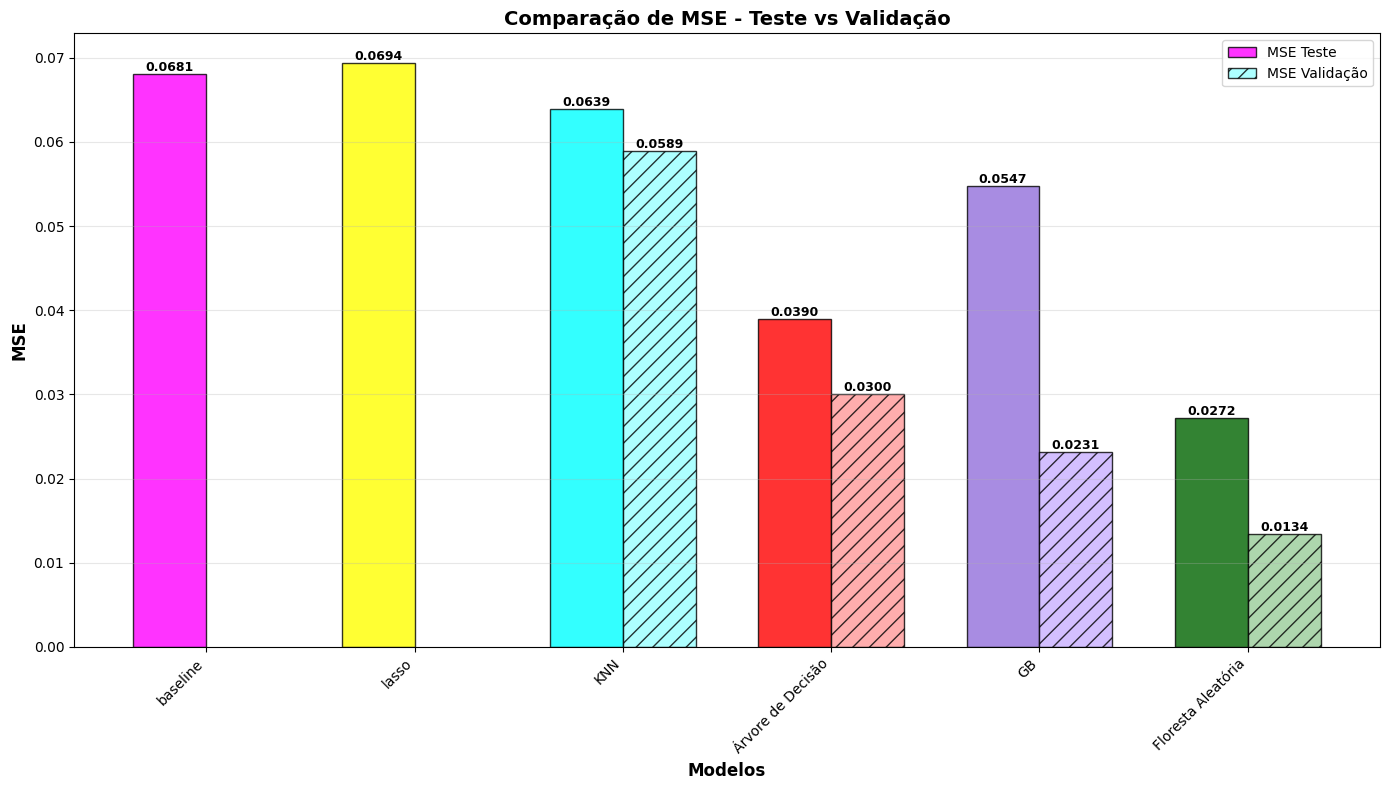

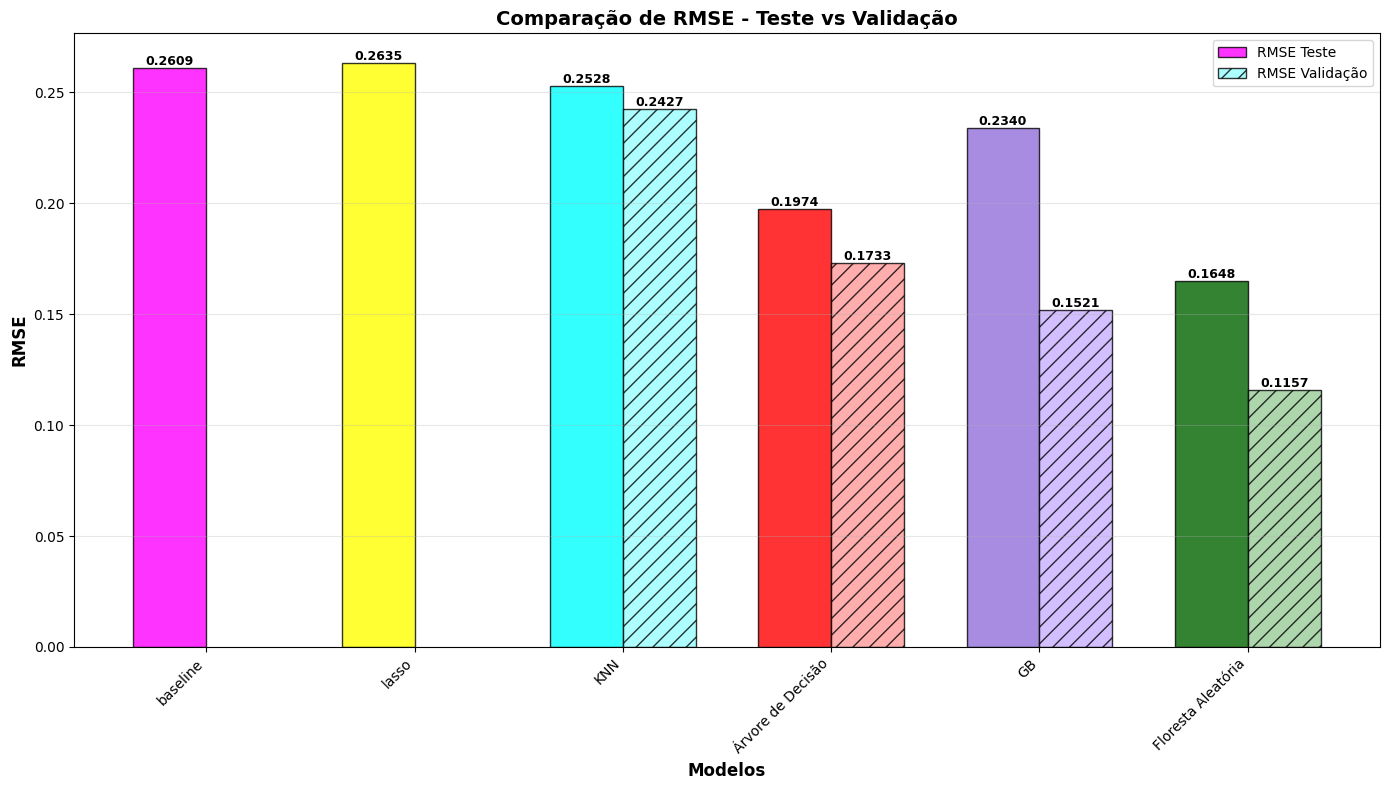

In [7]:
import matplotlib.pyplot as plt
import json
import os

# Dicionário de cores
cores = {
    'baseline': 'magenta', 
    'lasso': 'yellow', 
    'LASSO': 'yellow',
    'gradient boosting': '#9370db',
    'GB': '#9370db',
    'Gradient Boosting': '#9370db',
    'knn': 'cyan',
    'KNN': 'cyan',
    'árvore de decisão': 'red',
    'Árvore de Decisão': 'red',
    'floresta aleatória': 'darkgreen',
    'Floresta Aleatória': 'darkgreen'
}

cores_claras = {
    'baseline': '#FF99FF', 
    'lasso': '#FFFF99',
    'LASSO': '#FFFF99',
    'gradient boosting': '#C9B0FF',
    'GB': '#C9B0FF',
    'Gradient Boosting': '#C9B0FF',
    'knn': '#99FFFF',
    'KNN': '#99FFFF',
    'árvore de decisão': '#FF9999',
    'Árvore de Decisão': '#FF9999',
    'floresta aleatória': '#99CC99',
    'Floresta Aleatória': '#99CC99'
}

def load_json_metrics(filename):
    """Carrega métricas de um arquivo JSON"""
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Arquivo {filename} não encontrado!")
        return None
    except json.JSONDecodeError:
        print(f"Erro ao decodificar JSON do arquivo {filename}")
        return None

def plot_mse_comparison(models_data):
    """Gráfico comparativo de MSE (teste vs validação)"""
    if not models_data:
        return
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    model_names = []
    mse_test = []
    mse_val = []
    colors_test = []
    colors_val = []
    
    for model_name, metrics in models_data.items():
        # Coletar MSE de teste
        if 'mse' in metrics:
            model_names.append(model_name)
            mse_test.append(float(metrics['mse']))
            colors_test.append(cores.get(model_name, 'gray'))
        else:
            continue
        
        # Coletar MSE de validação se existir
        if 'mse_val' in metrics:
            mse_val.append(float(metrics['mse_val']))
            colors_val.append(cores_claras.get(model_name, 'lightgray'))
        else:
            mse_val.append(None)
            colors_val.append('lightgray')
    
    # Criar posições para as barras
    x = range(len(model_names))
    width = 0.35
    
    # Plotar barras de teste
    bars_test = ax.bar([i - width/2 for i in x], mse_test, width, 
                      label='MSE Teste', color=colors_test, alpha=0.8, edgecolor='black')
    
    # Plotar barras de validação (apenas para modelos que têm)
    val_positions = [i for i, val in enumerate(mse_val) if val is not None]
    val_values = [val for val in mse_val if val is not None]
    val_colors = [colors_val[i] for i in val_positions]
    
    if val_positions:
        bars_val = ax.bar([val_positions[i] + width/2 for i in range(len(val_positions))], 
                         val_values, width, label='MSE Validação', 
                         color=val_colors, alpha=0.8, edgecolor='black', hatch='//')
    
    # Customizar gráfico
    ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
    ax.set_ylabel('MSE', fontsize=12, fontweight='bold')
    ax.set_title('Comparação de MSE - Teste vs Validação', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for bar in bars_test:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    if 'bars_val' in locals():
        for bar in bars_val:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_rmse_comparison(models_data):
    """Gráfico comparativo de RMSE (teste vs validação)"""
    if not models_data:
        return
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    model_names = []
    rmse_test = []
    rmse_val = []
    colors_test = []
    colors_val = []
    
    for model_name, metrics in models_data.items():
        # coletar RMSE de teste
        if 'rmse' in metrics:
            model_names.append(model_name)
            rmse_test.append(float(metrics['rmse']))
            colors_test.append(cores.get(model_name, 'gray'))
        else:
            continue
        
        # coletar RMSE de validação se existir
        if 'rmse_val' in metrics:
            rmse_val.append(float(metrics['rmse_val']))
            colors_val.append(cores_claras.get(model_name, 'lightgray'))
        else:
            rmse_val.append(None)
            colors_val.append('lightgray')
    
    x = range(len(model_names))
    width = 0.35
    
    # plotar barras de teste
    bars_test = ax.bar([i - width/2 for i in x], rmse_test, width, 
                      label='RMSE Teste', color=colors_test, alpha=0.8, edgecolor='black')
    
    # plotar barras de validação para modelos que têm
    val_positions = [i for i, val in enumerate(rmse_val) if val is not None]
    val_values = [val for val in rmse_val if val is not None]
    val_colors = [colors_val[i] for i in val_positions]
    
    if val_positions:
        bars_val = ax.bar([val_positions[i] + width/2 for i in range(len(val_positions))], 
                         val_values, width, label='RMSE Validação', 
                         color=val_colors, alpha=0.8, edgecolor='black', hatch='//')
    
    # customizar gráfico
    ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
    ax.set_title('Comparação de RMSE - Teste vs Validação', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    for bar in bars_test:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    if 'bars_val' in locals():
        for bar in bars_val:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# executar os gráficos
def main():
    models_data = load_json_metrics('model_metrics.json')
    
    if models_data:
        print("Modelos encontrados no JSON:")
        for name, metrics in models_data.items():
            print(f"- {name}")
            for key, value in metrics.items():
                if key not in ['type']:
                    print(f"  {key}: {value}")
            print()
        
        plot_mse_comparison(models_data)
        plot_rmse_comparison(models_data)
    else:
        print("Não foi possível carregar os dados do arquivo JSON.")

main()

## Conclusão

Este estudo demonstrou a importância da comparação sistemática de algoritmos para selecionar a abordagem mais adequada. A Floresta Aleatória mostrou-se como a escolha mais balanceada, oferecendo alta performance com complexidade computacional razoável. Os resultados reforçam que não existe "melhor algoritmo universal", mas sim o algoritmo mais adequado para cada contexto específico.

A metodologia apresentada serve como framework para futuras comparações e pode ser adaptada para diferentes domínios e tipos de problemas de machine learning.

## Referências

[1] JSON.ORG. JSON. Disponível em: <https://www.json.org/json-en.html>.